# Overview

Linear regression, is a **linear** regression model. It has been around for quite some time and it is still used heavily today. It doesn't achieve state of art performance, but it helps us answer some questions that other models can't answer. Some of those questions are: 

1) Are the independent variables related to the dependent variable? 

2) How strongly are they related? 

3) How certain are we that the independent variables are related to the dependent variable?

4) Is the relationship between independent variables and dependent variable linear?

5) Is there synergy among independent variables?

## Formula 

Linear regression models, belong to the family of **parametric** methods. The formula of linear regression is:

$$\displaystyle \mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }}$$

$$\displaystyle \mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\quad $$ $$\quad 
\displaystyle X={\begin{pmatrix}\mathbf {x} _{1}^{\top }\\\mathbf {x} _{2}^{\top }\\\vdots \\\mathbf {x} _{n}^{\top }\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{pmatrix}},$$ 
$$\displaystyle {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}},\quad {\boldsymbol {\varepsilon }}={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\vdots \\\varepsilon _{n}\end{pmatrix}}.$$

Where: $\mathbf {y}$ are the dependent variable , $\mathbf {X}$ is the dependent variables, $\displaystyle {\boldsymbol {\beta }}$ are the training parameters, and $\displaystyle {\boldsymbol {\varepsilon }}$ is the error term. 

## Assumptions 

1) Weak exogeneity - independent variables are not wrongly measured (unrealistic assumption at most cases)

2) Linearity - the dependent variable is a linear combination of the independent variables 

3) Homoscedasticity - constant variance, meaning constant error term

4) Independence of errors - errors are not correlated (white noise)

5) Lack of perfect multicollinearity - independence among independent variables


# Implementation

In this section, we will apply the various models of linear regression.

## Simple Linear Regression

It is a linear regression with a single independent variable, therefore its formula should be: 

$$Y = \beta_{0} + \beta_{1} x_{1} + \varepsilon$$

Where $\beta_{0}$ and $\beta_{1}$ are two unknown constants that represent the intercept and slope terms (aka model parameters/coefficients) in the linear model. Once the model is trained from the data, and we have produced the estimates $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ we will be able to predict the future values of $Y$ by computing: $$ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}} x$$


We can implement the simple linear regression using the built-in 'Boston' data set from the sklearn module.

As dependent variable (target) we will use the $MEDV$ (median value of owner-occupied homes in 1000$) and as independent variable the $RM$(average numbers of rooms per dwelling).

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import api
import statsmodels.formula.api as smf
from sklearn import datasets 
from sklearn import linear_model


data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

# Let's check out the data frame

df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [216]:
# Let's check out the target variables 

target.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [217]:
x = df[['RM']]
y = target['MEDV']

### Model training 

A question someone could have is, but how are those parameters got trained?

We used the least squared method. This method aims to modify the parameters so that the sum of residuals is minimized.

But how is the sum of residuals is defined?

$$RSS = \sum_{i=1}^{n}e_{i}^{2}$$

where $e_{i} = y_{i}-\hat{y_{i}} = y_{i} - \hat{\beta_{0}}- \hat{\beta_{1}} x_{i}$

For a simple linear regression, the parameters to minimize the RSS are calculated as following: 

$$\hat{\beta_{1}} = \dfrac{\sum_{i = 1}^{n}(x_{i} - \bar{x})(y_{i}-\bar{y})}{\sum_{i = 1}^{n}(x_{i} - \bar{x})^{2}}$$

and 

$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}}\bar{x}$$

where $\bar{y} = \sum_{i = 1}^{n}y_{i}$ and $\bar{x} = \sum_{i = 1}^{n}x_{i}$ are the sample means. 

The standard error of an estimator reflects how it varies under repeated sampling.

$ SE(\hat{\beta_{1}})^{2} = \dfrac{\sigma^{2}}{\sum_{i = 1}^{n}(x_{i} - \bar{x})^{2}}$, $ SE(\hat{\beta_{0}})^{2} = \sigma^{2}[\dfrac{1}{n}+\dfrac{\bar{x}^{2}}{\sum_{i = 1}^{n}(x_{i} - \bar{x})^{2}}]$, where $\sigma^{2} = Var(\varepsilon)$.

These standard errors can be used to compute confidence intervals. A 95% **confidence interval** is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter. It has the form: 

$$\hat{\beta_{1}} \pm 2 SE(\hat{\beta_{1}})$$


Standard errors can also be used to perform **hypothesis tests** on the coefficients. The most common hypothesis test involves testing the null hypothesis of:
H 0 : There is no relationship between X and Y versus the alternative hypothesis
H A : There is some relationship between X and Y .

Mathematically, this corresponds to testing
$$H 0 : \beta_{1} = 0$$

versus
$$H A : \beta_{1} \neq 0$$

since if $\beta_{1} = 0$ then the model reduces to $Y = \beta_{0} + \varepsilon, and X is not associated with Y.

To test the null hypothesis, we compute a t-statistic, given by:

$$t =  \dfrac{\hat{\beta_{1}}-0}{SE(\hat{\beta_{1}})}$$

This will have a t-distribution with n − 2 degrees of freedom, assuming $\beta_{1} = 0$.

Using statistical software, it is easy to compute the probability of observing any value equal to |t| or larger. We
call this probability the p-value.

### Model Performance

In order to measure the performance of the predictive model, we can use RSE (Residual Standard Error), R-squared, F-statistic. 

The RSE is calculated as following: 

$$\sqrt{\dfrac{1}{n-2}RSS} = \sqrt{\dfrac{\sum_{i=1}^{n}e_{i}^{2}}{n-2}} = \sqrt{\dfrac{\sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^{2}}{n-2}}$$

The R-squared is calculated as following: 

$$R^{2} = \dfrac{TSS - RSS}{TSS} = 1 - \dfrac{RSS}{TSS}$$

Where TSS is the total sum of squares that is calculated as $\sum_{i}(y_{i}-\bar{y})^{2}$

The F-statistic is calculated as following: 

$$F = \dfrac{\dfrac{TSS-RSS}{p}}{\dfrac{RSS}{n - p - 1}}$$

Where p is the number of independent variables and n the number of samples. 

F-statistic indicates whether there is a relationship between the predictors and the target. If F-statistic is close to 1, there is no relationship.

Using the p-values we can see which are the important variables. But what do we do if not all variables are not significant? Well, remove them! This process is called variable selection. We can't go over all the possible combinations because there are $2^{p}$ combinations. I will not go through great detail on this task, but only through the most basic approaches. 

* **Forward selection**: We begin with intercept, then we add the variable that leads to the lowest RSS. This process continues till some stoping rule is satisfied.

* **Backward selection**: We begin with all the variables, then we remove the variable with the highest p-value. This process continues till some stoping rule is satisfied.

* **Mixed selection**: We start with no variables in the model, and as with forward selection, we add the variable that provides the best fit. However if one variable's p-value is above a certain threshold we remove it. We keep on doing those steps up until all the model's variables have low p-value and the variables outside the model have high p-values.

Some other notable ways to measure the model's performance are: 

* **Adjusted R-Squared**: Adjusted $R^{2}$ also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model.$1-[\dfrac{(1-R^{2})(n-1)}{n-k-1}]$

* **MSE**: The mean squared error, $\dfrac{\sum_{i}^{n}(y_{i}-f_{i})^{2}}{n}$

* **RMSE**: The root mean squared error, $\sqrt{\dfrac{\sum_{i}^{n}(y_{i}-f_{i})^{2}}{n}}$

* **AIC**: an estimate of the relative information lost when a given model is used to represent the process that generated the data. (In doing so, it deals with the trade-off between the goodness of fit of the model and the simplicity of the model.) The model with the lowest AIC is preferred.

* **BIC**:  It is closely related to the Akaike information criterion (AIC), but with a different penalty for the number of parameters. The model with the lowest BIC is preferred.




But before we fit the model, let's visualize the relationship between the two variables so that we know what to expect. 

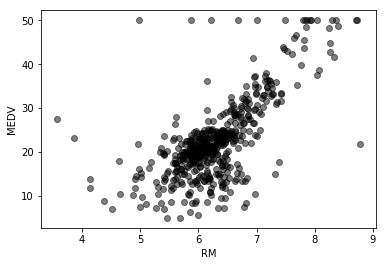

In [218]:
plt.scatter(x, y, c="black", alpha=0.5)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

We should expect to have a positive slope term and a negative intercept. 

In [219]:
df_c = pd.concat((df, target['MEDV']), axis = 1)
mod = smf.ols(formula='MEDV ~ RM', data=df_c)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           2.49e-74
Time:                        17:09:22   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

An alternative way of doing a simple linear regression is : 

In [221]:
x = api.add_constant(x)
model = api.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           2.49e-74
Time:                        17:09:30   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Diagnostics

We will go through the important measures of the summary. The first thing I look at when I am retrieving the summary, is the R-squared so that I can see how well the model explains the variation at the data. In the particular case, R-squared is really low so we should totally work on our model. Another important measure to look at are the P values, it seems that they are both significant (less than 5%). Now, once we know if the model works nice or not, let's interprete the relationship between the variables. The slope term, is $9.102$ which means, that if we increase the value of $RM$ by one, the variable $MDEV$ should increase by $9.102$.

Diagnostics are cool, but let's see the line that we have created!


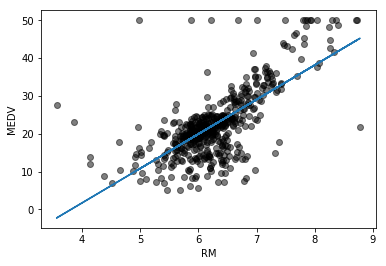

In [183]:
y_hat = model.predict(x)
plt.scatter(x["RM"], y, c="black", alpha=0.5)
plt.plot(x["RM"], y_hat)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

We can also conduct linear regression using $sklearn$, but it is not recommended because the diagnostics are not as informative. 

Let's fit the model.

In [184]:
x = df[['RM']]
y = target['MEDV']
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

As I mentioned before, $sklearn's$ diagnostics are a bit poor, and all we can see are the intercept, coefficient (slope term) and the R-squared. This is really not enough because we are don't know how important every variable is for the determination of the model. However, it can be a good indicator if we performed the analysis correctly before, and it seems like we did. 

In [185]:
lm.coef_

array([ 9.10210898])

In [186]:
lm.intercept_

-34.670620776438568

In [187]:
lm.score(x,y)

0.48352545599133429

## Multiple Linear Regression

In many cases, simple linear regression is just too simple to be able to predict the target variable because it is influenced by more than one predictors. Let's try to predict $MEDV$ using $RM$ and $LSTAT$.



In [222]:
df_c = pd.concat((df, target['MEDV']), axis = 1)
mod = smf.ols(formula='MEDV ~ RM + LSTAT', data=df_c)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 28 Jan 2018   Prob (F-statistic):          7.01e-112
Time:                        17:11:18   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

In [223]:
x = df[['RM', 'LSTAT']]
y = target['MEDV']

In [224]:
# Let's get the model fit!
x = api.add_constant(x)
model = api.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 28 Jan 2018   Prob (F-statistic):          7.01e-112
Time:                        17:11:22   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the slope terms are significant while the constant one is not. Moreover, notice that the R-squared is increased as long as the Adjusted R-squared!

Let's go ahead now and conduct the forward selection method to retrieve the best model possible. Take into consideration that when we want to have the impactful variables into our model, we focus at **Adjusted R-squared**.

At the $statsmodel$ module, there is no such a build in function so we should build it ourselves! The function didn't come out of my head, but it is a modification of this [post](https://planspace.org/20150423-forward_selection_with_statsmodels/)

In [228]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [229]:
# Let's calculate the time that it takes to run
import timeit

start = timeit.default_timer()
df_c = pd.concat([df.reset_index(drop=True), y], axis=1)

model = forward_selected(df_c, 'MEDV')

stop = timeit.default_timer()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 28 Jan 2018   Prob (F-statistic):          5.74e-137
Time:                        17:11:34   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3694      5.069      7.176      0.0

## Extensions of the Linear Model

While linear regression models are good, but they make some strong assumptions that at real life they are violated.

The linear assumption states that the change in the response $Y$ due to a one-unit change in $X_{j}$ is constant, regardless of the value of $X_{j}$.


### Removing the Additive Assumption

Consider the standard linear regression model with two variables,

$$Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \epsilon$$

According to this model, if we increase $X_{1}$ by one unit, then $Y$ will increase by an average of $\beta_{1}$ units. Notice that the presence of $X_{2}$ does not alter this statement—that is, regardless of the value of $X_2$ , a one-unit increase in $X_1$ will lead to a $\beta_{1}$-unit increase in $Y$.

One way of extending this model to allow for interaction effects is to include a third predictor, called an interaction term, which is constructed by computing the product of $X_{1}$ and $X_{2}$ . This results in the model
$$Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{1}X_{2} + \epsilon$$

How does inclusion of this interaction term relax the additive assumption?

$$Y = \beta_{0} +(\beta_{1}+ \beta_{3}X_{2})X_{1} + \beta_{2}X_{2}  + \epsilon$$
$$ = \beta_{0} +\tilde{\beta_{1}}X_{1} + \beta_{2}X_{2}  + \epsilon$$

Let's try an make an interaction between $LSTAT$ and $RM$.

In [232]:
model_interaction = smf.ols(formula='MEDV ~ LSTAT * RM ', data=df_c).fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Sun, 28 Jan 2018   Prob (F-statistic):          1.75e-146
Time:                        17:53:28   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.1245      3.342     -8.713      0.000     -35.692     -22.558
LSTAT          2.1940      0.206     10.666      0.000       1.790       2.598
RM             9.7013      0.500     19.393      0.000       8.718      10.684
LSTAT:RM      -0.4849      0.035    -14.018      0.000      -0.553      -0.417
==============================================================================
Omnibus:                      223.968   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2182.462
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      12.613   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Non-linear Relationships

Another assumption that it is usually not true is that the relationship between predictors and response is linear. The solution to this problem is **polynomial regression**.

Let's assume that we have two predictors, a possible formula of the polynomial regression could be: 

$$Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2} X_{2} + \beta_{3} X_{2}^{2} $$

Let's try to predict $MEDV$ and $LSTAT$ and $RM$.


In [233]:
model_polynomial = smf.ols(formula='MEDV ~ LSTAT + RM + I(LSTAT ** 2.0)', data=df_c).fit()
model_polynomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     396.2
Date:                Sun, 28 Jan 2018   Prob (F-statistic):          6.50e-132
Time:                        18:03:10   Log-Likelihood:                -1533.0
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     502   BIC:                             3091.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.6896      3.138      3.725      0.000       5.524      17.855
LSTAT              -1.8486      0.122    -15.136      0.000      -2.089      -1.609
RM                  4.2273      0.412     10.267      0.000       3.418       5.036
I(LSTAT ** 2.0)     0.0363      0.003     10.443      0.000       0.030       0.043
==============================================================================
Omnibus:                      123.119   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.618
Skew:                           1.105   Prob(JB):                     4.15e-90
Kurtosis:                       6.826   Cond. No.                     4.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Potential Problems

Linear regression is good at some aspects, but it is not really good at others! 

### 1. Non-linearity of the Data

In this case, the performance of the model will be poor. You can diagnose a non-linearity out of the residual plots. If you see a pattern into that plot, then there is a pattern that a linear model cannot capture. 

### 2. Correlation of error terms

In those cases, we may have an unwarranted sense of confidence in our model. Such correlations frequently occur in the context of time series data. 

### 3. Non-constant Variance of Error Terms

It is often the case that the variances of the error terms are
non-constant. One can identify non-constant variances in the errors, or heteroscedasticity, from the presence of a funnel shape in the residual plot. 


When faced with this problem, one possible solution is to transform the response $Y$ using a concave function such as $\log Y$ or $\sqrt{Y}$ . Such a transformation results in a greater amount of shrinkage of the larger responses, leading to a reduction in heteroscedasticity.

### 4. Outliers

An outlier is a point for which y i is far from the value predicted by the model. It is typical for an outlier that does not have an unusual
predictor value to have little effect on the least squares fit.  Residual plots can be used to identify outliers. 

### 5. High Leverage Points

This is the exact opposite of the outliers case. This problem occurs when the predictors have abnormal values. 

In a simple linear regression, high leverage observations are fairly easy to identify, since we can simply look for observations for which the predictor value is outside of the normal range of the observations. This is not the case for multivariate linear regression. 

In order to quantify an observation’s leverage, we compute the leverage
statistic. A large value of this statistic indicates an observation with high leverage.

$$h_{i} = \dfrac{1}{n} + \dfrac{(x_{i} - \bar{x})^{2}}{\sum_{i'=1}^{n}(x_{i'} - \bar{x})^{2}} $$ 

It is clear from this equation that $h_{i}$ increases with the distance of $x_{i}$ from $\bar{x}$. 

There is a simple extension of $h_{i}$ to the case of multiple predictors, though we do not provide the formula here. The leverage statistic $h_{i}$ is always between $\dfrac{1}{n}$ and the average leverage for all the observations is always equal to $\dfrac{p + 1}{n}$. So if a given observation has a leverage statistic that greatly exceeds $\dfrac{p+ 1}{n}$, then we may suspect that the corresponding
point has high leverage.

### 6. Collinearity 

Collinearity refers to the situation in which two or more predictor variables collinearity are closely related to one another. 

Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat{\beta_{j}}$ to grow. Recall that the t-statistic for each predictor is calculated by dividing $\hat{\beta_{j}}$ by its standard
error. Consequently, collinearity results in a decline in the t-statistic. As a result, in the presence of collinearity, we may fail to reject $H 0 : \beta_{j} = 0$. This means that the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by collinearity.

Instead of inspecting the correlation matrix, a better way to assess multi-collinearity is to compute the variance inflation factor (VIF). The VIF is the ratio of the variance of $\hat{\beta_{j}}$ when fitting the full model divided by the variance of $\hat{\beta_{j}}$ if fit on its own. The smallest possible value for VIF is 1, that indicates complete absence of collinearity. A rule of thumb rule is that if it exceeds 5 or 10 indicates a problematic amount of collinearity. 

The VIF for each variable can be computed using the formula

$$VIF(\hat{\beta_{j}}) = \dfrac{1}{1 - R^{2}_{X_{j}|X_{-j}}} $$

Where $R^{2}_{X_{j}|X_{-j}}$ is the $R^{2}$ from a regression of $X_{j}$ onto all the other predictors.